# Latar Belakang
A fictitious SaaS company wants to improve their profits primarily by increasing their profits in areas / industries that are underperforming. The company wants a concrete step they can make to better their profits in these underperforming areas to maximize their overall profits.


## Pernyataan Masalah
- Correctly Identify problem areas/industries that the company is currently facing.

- Construct a concrete action that is concluded from data-driven insights.

- Maximizing Profit

#### Data Handling -- Missing Values

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('SaaS-Sales.csv')

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


No Missing Values

#### Data Handling -- Outliers

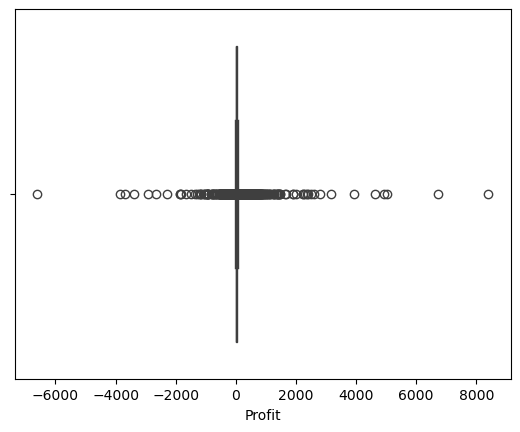

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Profit'])
plt.show()

##### Removing outliers

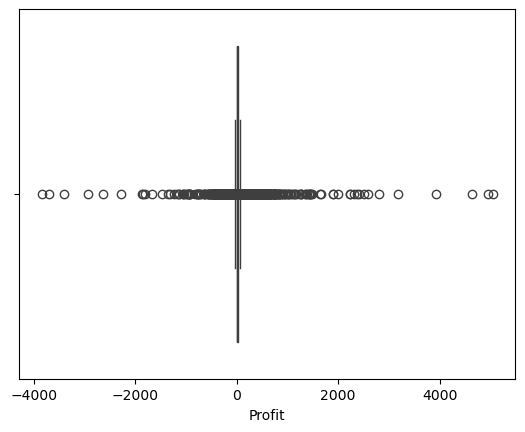

In [3]:
lower_bound = -6000
upper_bound = 6000

df_cleaned = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

sns.boxplot(x=df_cleaned['Profit'])
plt.show()

df = df_cleaned

#### Data handling -- Duplications

In [4]:
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Date Key, Contact Name, Country, City, Region, Subregion, Customer, Customer ID, Industry, Segment, Product, License, Sales, Quantity, Discount, Profit]
Index: []


#### Data Handling -- Formatting

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

string_cols = ['Country', 'City', 'Region', 'Subregion', 'Customer', 'Industry', 'Segment', 'Product']
for col in string_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

df['License'] = df['License'].astype(str).str.strip().str.upper()
df['Order ID'] = df['Order ID'].astype(str).str.strip().str.upper()

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['sales'] = df['sales'].round(2)
df['profit'] = df['profit'].round(2)

print("Data Formatting Complete")

Data Formatting Complete


#### Data Handling -- Misc

In [6]:
df_anomaly = df[df['profit'] > df['sales']]

print("Number of rows where profit > sales:", len(df_anomaly))
print(df_anomaly[['order_id', 'product', 'sales', 'profit']])

Number of rows where profit > sales: 0
Empty DataFrame
Columns: [order_id, product, sales, profit]
Index: []


In [7]:
print("Unique Regions:")
print(df['region'].unique())

print("Unique Subregions:")
print(df['subregion'].unique())

print("Unique Countries:")
print(df['country'].unique())

Unique Regions:
['Emea' 'Amer' 'Apj']
Unique Subregions:
['Ukir' 'Namer' 'Eu-West' 'Nor' 'Japn' 'Eu' 'Mea' 'Latam' 'Anz' 'Apac'
 'Ind' 'Eu-East']
Unique Countries:
['Ireland' 'United States' 'Germany' 'Sweden' 'Canada' 'Japan' 'Italy'
 'Turkey' 'Costa Rica' 'France' 'Australia' 'Luxembourg' 'Brazil'
 'Philippines' 'India' 'United Kingdom' 'Chile' 'Spain' 'South Africa'
 'Portugal' 'Colombia' 'Belgium' 'Russia' 'Netherlands' 'Mexico' 'Poland'
 'Singapore' 'New Zealand' 'Czech Republic' 'Saudi Arabia' 'Argentina'
 'South Korea' 'Finland' 'Israel' 'Norway' 'Ukraine'
 'United Arab Emirates' 'Greece' 'China' 'Austria' 'Indonesia' 'Egypt'
 'Denmark' 'Croatia' 'Taiwan' 'Qatar' 'Slovenia' 'Iceland']


##### Fixing Regions and Subregions into clearer words

In [8]:
eu_countries = df[df['subregion'] == 'Eu']['country'].unique()

print("Countries under 'Eu':", eu_countries)

Countries under 'Eu': ['Italy']


In [9]:
region_map = {
    'Emea': 'EMEA',
    'Amer': 'AMER',
    'Apj': 'APAC'
}

subregion_map = {
    'Ukir': 'UK & Ireland',
    'Namer': 'North America',
    'Eu-West': 'Europe West',
    'Eu-East': 'Europe East',
    'Eu': 'Europe West',
    'Nor': 'Nordics',
    'Japn': 'Japan',
    'Mea': 'Middle East & Africa',
    'Latam': 'Latin America',
    'Anz': 'Australia & New Zealand',
    'Apac': 'Asia Pacific',
    'Ind': 'India'
}

df['region'] = df['region'].map(region_map).fillna(df['region'])
df['subregion'] = df['subregion'].map(subregion_map).fillna(df['subregion'])

print("Cleaned Regions:", df['region'].unique())
print("Cleaned Subregions:", df['subregion'].unique())

Cleaned Regions: ['EMEA' 'AMER' 'APAC']
Cleaned Subregions: ['UK & Ireland' 'North America' 'Europe West' 'Nordics' 'Japan'
 'Middle East & Africa' 'Latin America' 'Australia & New Zealand'
 'Asia Pacific' 'India' 'Europe East']


#### Uploading Data --> To be analyzed in Tableau and Excel

In [10]:
df.to_csv('cleaned_data.csv', index=False)